<a href="https://colab.research.google.com/github/seoyeon7/ML_IDS_Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# read & manipulate data
import pandas as pd
import numpy as np
import tensorflow as tf

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# misc
import random as rn

# manual parameters
RANDOM_SEED = 42
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to enseure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [105]:
dataset = pd.read_csv('/content/DATA.csv')
df=pd.DataFrame(dataset)

In [106]:
df

,Timestamp,X,DLC,ID
0,1.334,60,13,96
1,1.523,00B0,12,176
2,1.708,175,12,373
3,1.846,006F,8,111
4,2.792,041C,8,1052
...,...,...,...,...
1048551,468074.954,01FA,13,506
1048552,468075.630,01CF,8,463
1048553,468076.092,130,10,304
1048554,468077.992,65,12,101


In [107]:
data=df.drop(['X'],axis=1)

In [108]:
data.dtypes

Timestamp    float64
DLC            int64
ID             int64
dtype: object

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048556 entries, 0 to 1048555
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Timestamp  1048556 non-null  float64
 1   DLC        1048556 non-null  int64  
 2   ID         1048556 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 24.0 MB


In [110]:
na_list = data.isna().sum().tolist()
for i in range(len(na_list)):
  if na_list[i] == 0:
    continue
  else:
    print('결측치 존재')
    break

In [111]:
null_values = data.isna().sum()
null_values[null_values != 0]

Series([], dtype: int64)

In [112]:
data.interpolate(method='ffill', inplace=True)

In [113]:
null_values = data.isna().sum()
null_values[null_values != 0]

Series([], dtype: int64)

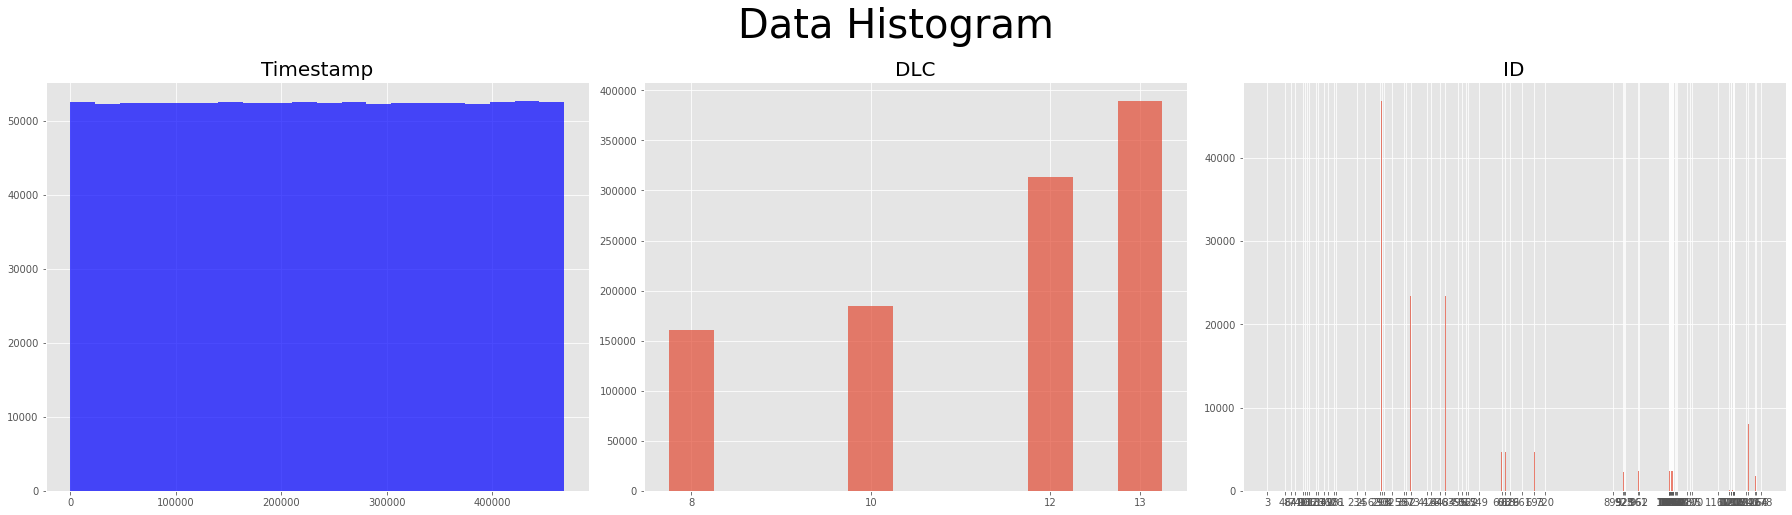

In [114]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize = 40)

cols = data.columns
for i in range(len(cols)):
    plt.subplot(3, 3, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.title(cols[i], fontsize=20) # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(data[cols[i]].unique()) > 1000: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력합니다. bins는 칸을 나누는 값이며 alpha는 투명도입니다.
        
    else: # 해당 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = data[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장합니다.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

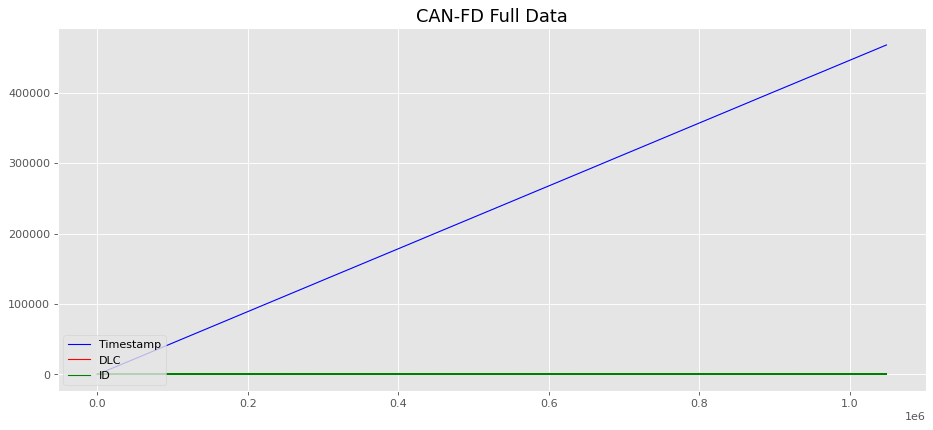

In [115]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(data['Timestamp'], label='Timestamp', color='blue', animated = True, linewidth=1)
ax.plot(data['DLC'], label='DLC', color='red', animated = True, linewidth=1)
ax.plot(data['ID'], label='ID', color='green', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('CAN-FD Full Data', fontsize=16)
plt.show()


In [116]:
for i in range(52560):  
  if data['Timestamp'].loc[i] > 200:
    data['Timestamp'].loc[i] = data['Timestamp'].mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [117]:
for i in range(52560):  
  if data['DLC'].loc[i] > 200:
    data['DLC'].loc[i] = data['DLC'].mean()

In [118]:
for i in range(52560):  
  if data['ID'].loc[i] > 200:
    data['ID'].loc[i] = data['ID'].mean()

In [119]:
def plot(column):
  plt.figure(figsize=(20, 4))
  plt.title(column)
  plt.scatter(data['Timestamp'], data[column])
  plt.legend(loc='upper right')
  plt.xlabel('Date')
  plt.show()

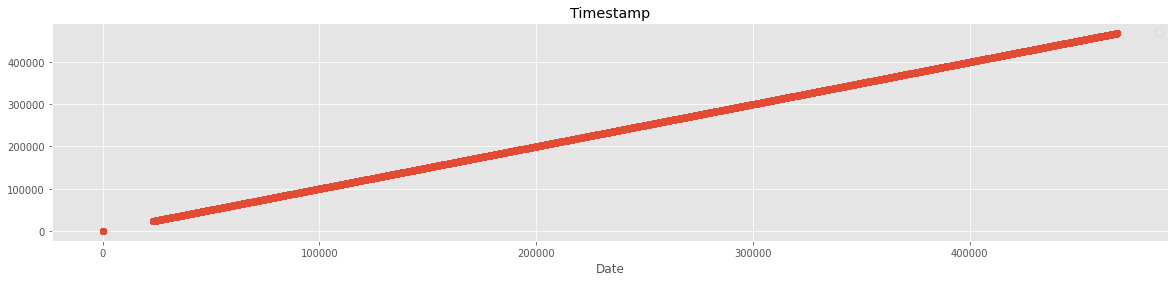

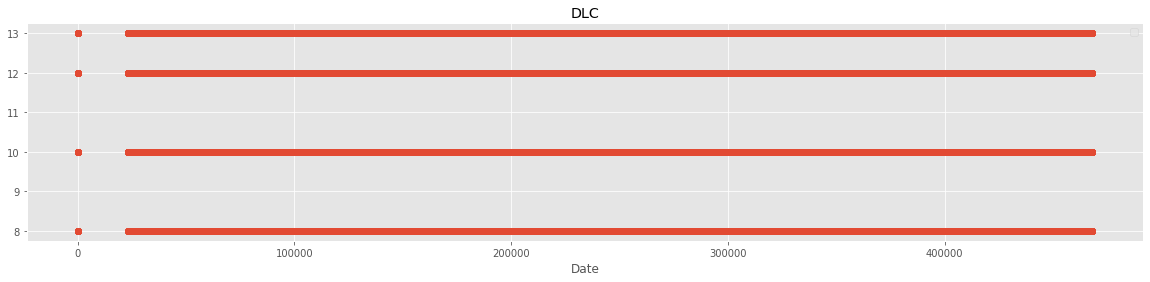

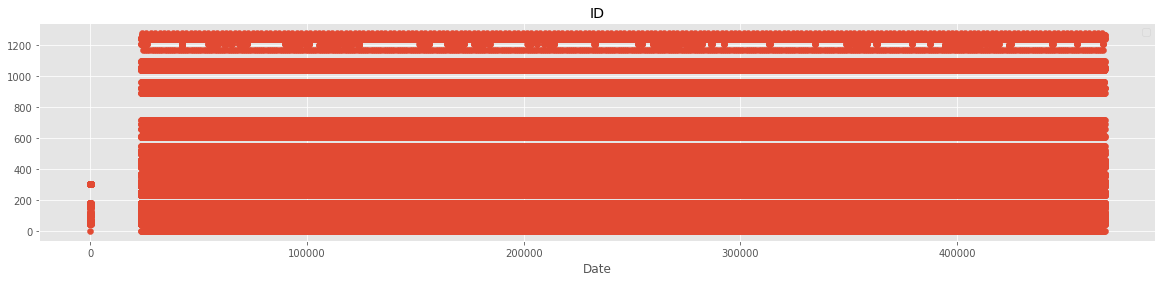

In [120]:
columns = ['Timestamp', 'DLC', 'ID']
for column in columns:
  plot(column)


In [121]:
del data['Timestamp']
T_corr = data.corr()
T_corr

,DLC,ID
DLC,1.000000,-0.572348
ID,-0.572348,1.000000


In [122]:
T_corr.to_csv("Train.corr.csv")